In [1]:
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
from mods import prep, plotter
%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append('./ligbind/')

In [3]:
import ligbind

In [46]:
Sim_Parent = ligbind.WymSimTest(sets=1000)

In [47]:
Sim_Clones = [copy.copy(Sim_Parent) for i in range(9)]

In [48]:
grid = np.array([[0,0],[2,0],[4,0],[0,-2],[2,-2],[4,-2],[0,-4],[2,-4],[4,-4]])

In [49]:
clip_bounds = grid + np.array([0,18])

In [50]:
for i in range(9):
    Sim_Clones[i].subset(clip_bounds[i][0],clip_bounds[i][1])

In [53]:
Sim_Clone_Fits = [ligbind.WymFit(i) for i in Sim_Clones]

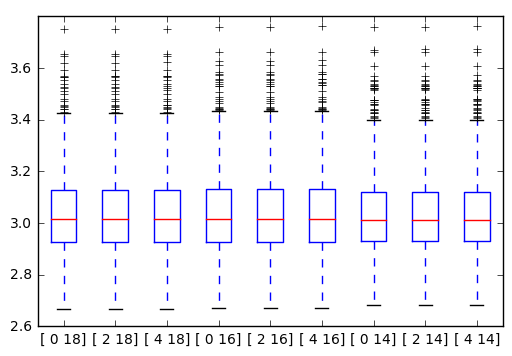

In [67]:
fig_k11 = plt.boxplot([i.k11 for i in Sim_Clone_Fits], showfliers=True,labels=[str(i) for i in clip_bounds])

{'bodies': [<matplotlib.collections.PolyCollection at 0x11429d4e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x114877d68>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x11485f550>,
 'cmedians': <matplotlib.collections.LineCollection at 0x11487d588>,
 'cmins': <matplotlib.collections.LineCollection at 0x1148777b8>}

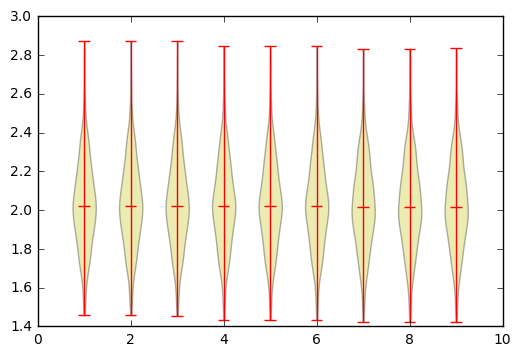

In [74]:
plt.violinplot([i.k21 for i in Sim_Clone_Fits],showmedians=True)


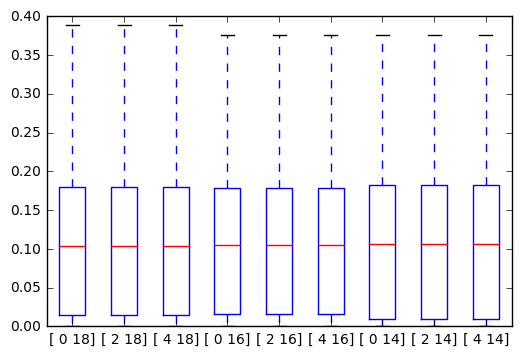

In [65]:
figk22 = plt.boxplot([i.k22 for i in Sim_Clone_Fits], showfliers=True,labels=[str(i) for i in clip_bounds])

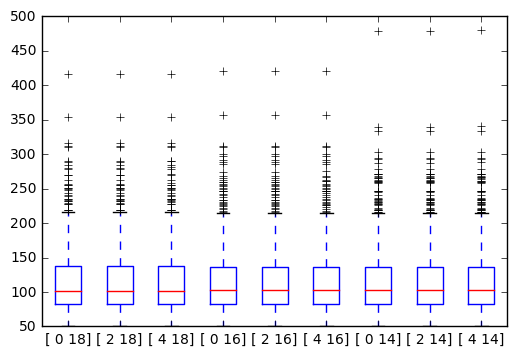

In [75]:
figl20 = plt.boxplot([i.l20 for i in Sim_Clone_Fits], showfliers=True,labels=[str(i) for i in clip_bounds])

In [81]:
[np.median(i.k11) for i in Sim_Clone_Fits]

[3.0159650426583635,
 3.0159680071096027,
 3.0158629191207389,
 3.0155229148033351,
 3.0155185362115438,
 3.0156236486811814,
 3.0117967139133777,
 3.0117942241952504,
 3.0116940039598781]

In [82]:
Sim_Clone_Fits_RelWt = [ligbind.WymFit(i,weight=2) for i in Sim_Clones]

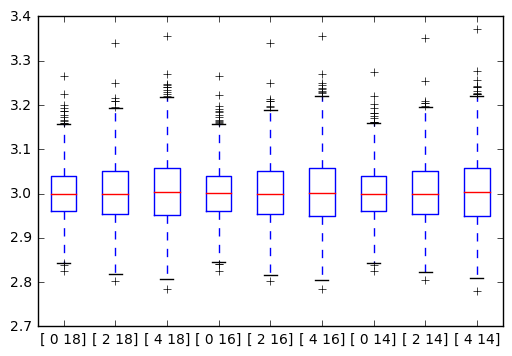

In [83]:
fig_k11 = plt.boxplot([i.k11 for i in Sim_Clone_Fits_RelWt], showfliers=True,labels=[str(i) for i in clip_bounds])

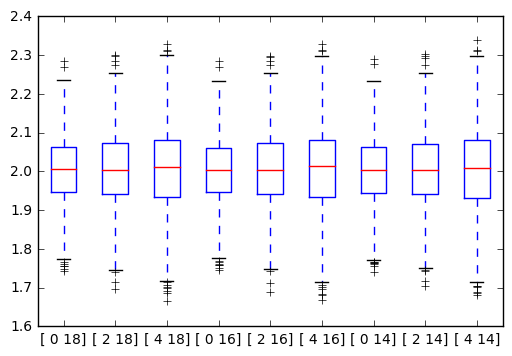

In [84]:
fig_k21 = plt.boxplot([i.k21 for i in Sim_Clone_Fits_RelWt], showfliers=True,labels=[str(i) for i in clip_bounds])

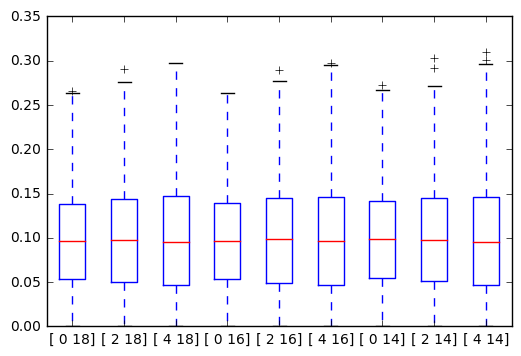

In [85]:
fig_k22 = plt.boxplot([i.k22 for i in Sim_Clone_Fits_RelWt], showfliers=True,labels=[str(i) for i in clip_bounds])

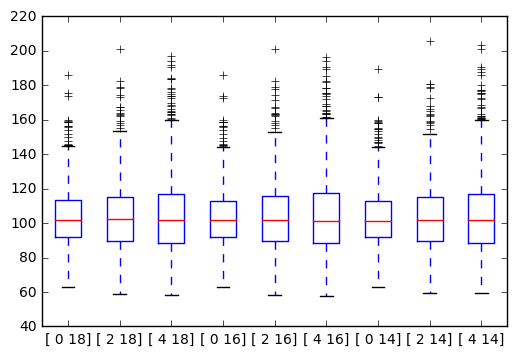

In [86]:
fig_kl20 = plt.boxplot([i.l20 for i in Sim_Clone_Fits_RelWt], showfliers=True,labels=[str(i) for i in clip_bounds])

(array([[  2.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  2.,   4.,   7.,   8.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   1.,  19.,  17.,  12.,   3.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  28.,  29.,  20.,   2.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   0.,  10.,  39.,  43.,  22.,   4.,   1.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   1.,  18.,  43.,  53.,  36.,   5.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   6.,  20.,  50.,  48.,  27.,   7.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 

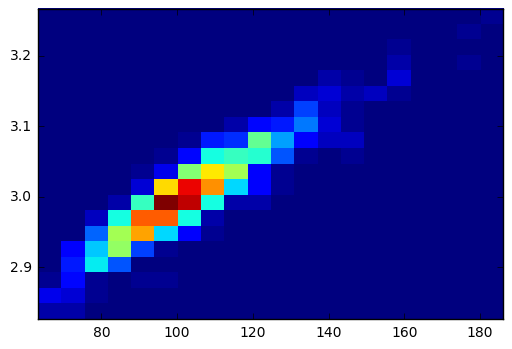

In [101]:
plt.hist2d(Sim_Clone_Fits_RelWt[0].l20,Sim_Clone_Fits_RelWt[0].k11,bins=20)

In [89]:
Sim_Parent.parms

array([   3. ,    2. ,    0.1,  100. ])

{'boxes': [<matplotlib.lines.Line2D at 0x118357438>,
 'caps': [<matplotlib.lines.Line2D at 0x11835de80>,
 'fliers': [<matplotlib.lines.Line2D at 0x11836b748>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118364860>,
 'whiskers': [<matplotlib.lines.Line2D at 0x118357e10>,
  <matplotlib.lines.Line2D at 0x118370f98>]}

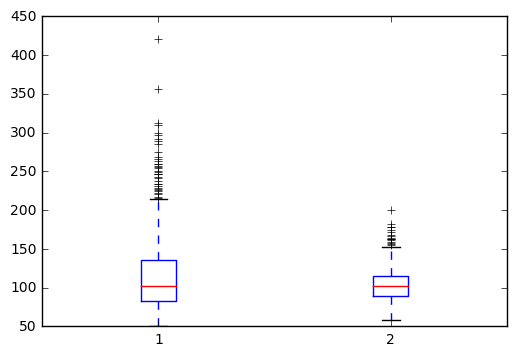

In [92]:
plt.boxplot([Sim_Clone_Fits[4].l20,Sim_Clone_Fits_RelWt[4].l20])

In [93]:
[np.median(i.k11) for i in Sim_Clone_Fits]

[3.0159650426583635,
 3.0159680071096027,
 3.0158629191207389,
 3.0155229148033351,
 3.0155185362115438,
 3.0156236486811814,
 3.0117967139133777,
 3.0117942241952504,
 3.0116940039598781]

In [94]:
[np.median(i.k11) for i in Sim_Clone_Fits_RelWt]

[2.9992747264415458,
 2.9991502084377455,
 3.0029181553849424,
 3.0004080971330795,
 2.9996023861081591,
 3.0024376245591426,
 2.9989135773763675,
 2.9987921091415748,
 3.0030899725246276]

In [102]:
fobj = Sim_Clone_Fits[0]

In [110]:
help(fobj.model.modfunc)

Help on function wymfunc in module ligbind.models:

wymfunc(parm, lig, rtot)
    Model function for dimerizing, single-site receptors as derived in 
    (Wyman and Gill, Binding and Linkage, 1990) and used by 
    (Macdonald and Pike, ...EGF-binding...negative cooperativity...aggregating system, 2008).
    Takes numpy array of parameters [k11,k21,k22,l20], numpy array of free ligand concentrations, 
    and total receptor concentration. Returns the fraction of receptor bound to ligand. 
    
    To generate a data set, iterate over an array of desired receptor concentrations, e.g.: 
    [wymfunc(parm,lig,i) for i in array_of_rtots]
    
    For use in curve fitting an objective function for use with scipy.optimize.least_squares 
    is readily constructed as: (wymfun(parm_guess,lig,rtot) - actual_data)



In [113]:
fobj.fits[0].fun

array([  7.87887057e-05,  -2.11491250e-04,  -3.10776222e-05,
         6.59486528e-04,   6.21026146e-04,  -1.39266874e-03,
        -2.54031967e-03,   6.24170949e-03,  -5.19118957e-03,
         6.49847848e-03,   4.54720167e-03,   1.92066127e-02,
         9.43882758e-05,   3.40612884e-02,  -4.17524672e-03,
        -2.10234301e-02,   2.74347046e-04,   2.40048242e-02,
        -8.73865213e-05,  -3.38929949e-05,   1.47524107e-04,
        -1.56667919e-04,  -6.39599322e-04,  -1.26831025e-03,
         7.99844699e-04,   1.79607322e-02,  -3.18273181e-03,
         1.74460198e-02,  -4.64660029e-02,  -2.86790908e-03,
         1.79673657e-02,  -9.26259722e-03,  -2.48729062e-02,
        -2.79698652e-02,  -1.43821972e-02,   3.02991481e-02,
         7.72795324e-05,  -1.59932432e-04,  -2.35050364e-04,
         1.16707112e-04,   4.87477225e-04,  -2.04854113e-03,
         3.85344055e-03,   8.35836599e-03,  -5.78512208e-03,
        -1.50417433e-02,  -1.86417505e-02,  -3.12564506e-02,
         1.06220440e-02,

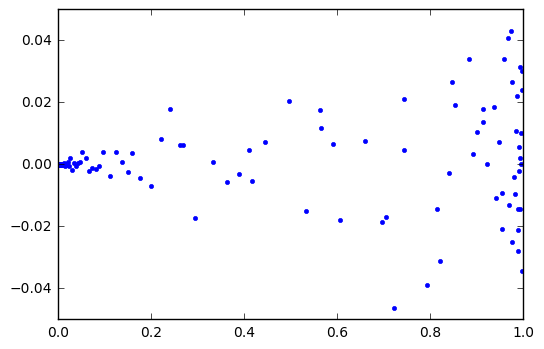

In [114]:
plotter.resplot(fobj.model.modfunc,fobj.fits[0],fobj.model.ligs,fobj.model.rtot)

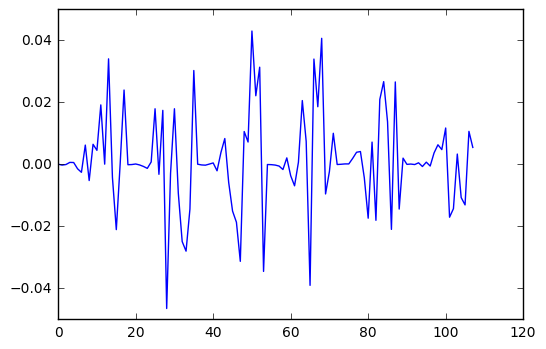

In [116]:
plt.plot(fobj.fits[0].fun)

(array([  1.,   1.,   1.,   1.,   2.,   2.,   4.,   6.,   3.,  10.,  40.,
         13.,   5.,   2.,   6.,   3.,   2.,   4.,   0.,   2.]),
 array([-0.046466  , -0.04199098, -0.03751595, -0.03304092, -0.0285659 ,
        -0.02409087, -0.01961584, -0.01514082, -0.01066579, -0.00619077,
        -0.00171574,  0.00275929,  0.00723431,  0.01170934,  0.01618437,
         0.02065939,  0.02513442,  0.02960944,  0.03408447,  0.0385595 ,
         0.04303452]),
 <a list of 20 Patch objects>)

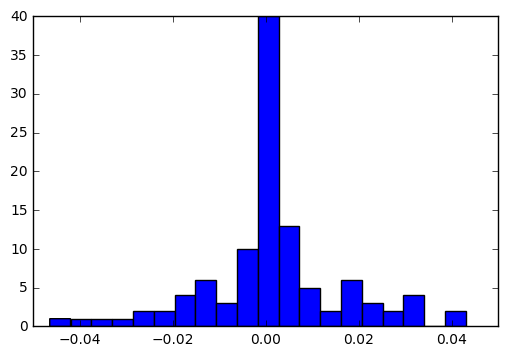

In [118]:
plt.hist(fobj.fits[0].fun,bins=20)

In [119]:
wfobj = Sim_Clone_Fits_RelWt[0]

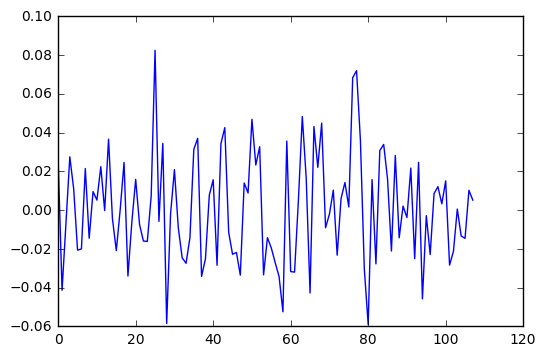

In [120]:
plt.plot(wfobj.fits[0].fun)

(array([ 13.,  37.,  38.,  17.,   3.]),
 array([-0.05906761, -0.03074521, -0.00242282,  0.02589957,  0.05422196,
         0.08254435]),
 <a list of 5 Patch objects>)

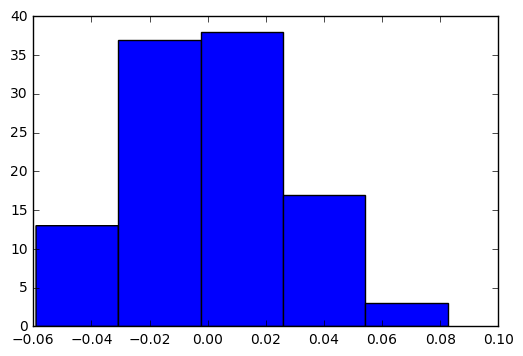

In [125]:
plt.hist(wfobj.fits[0].fun,bins=5)

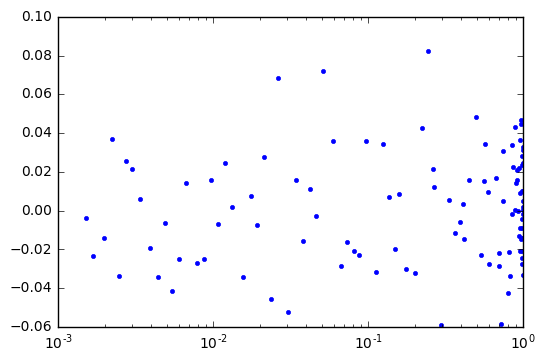

In [127]:
plotter.resplot(wfobj.model.modfunc,wfobj.fits[0],wfobj.model.ligs,wfobj.model.rtot)
plt.xscale('log')